In [1]:
import os
import sys

sys.path.append("../..")

import numpy as np
import matplotlib.pyplot as plt
from scripts.datagen.create_dataset import create_dataset
from scripts.utils.params import SolverParams

In [2]:
# Instantiate a SolverParams object by reading the parameters from file
# to change the parameters thorugh file, please refer to scripts/utils/parameters_files/READMEparams.txt
s_params = SolverParams.get_from_file(
    "../../scripts/utils/parameters_files/parameters_VDP.txt"
)

# Print the parameters
s_params.print_params()

Solver =  thetamethod
T =  25.0
dt =  0.1
u0 =  [1.0, 1.0]
Theta:  0.5
Tolerance:  0.01


In [3]:
# Create the dataset for the Van Der Pol oscillator

# Choose the name for your dataset
dataset_name = "VDP_test"

# Choose the value mu for the model
mu = 1.0

# Choose the number of samples and of processors. Further details inside the README.md file
# The result will be stored inside dataset/dataset_name
create_dataset(
    dataset_name=dataset_name,
    num_samples=10,
    num_processes=4,
    model_name="Van Der Pol",
    solver_params=s_params,
    model_params=mu,
    generate=True,
    remove_samples=True,
)

Program finished in 8.861995799990837 seconds


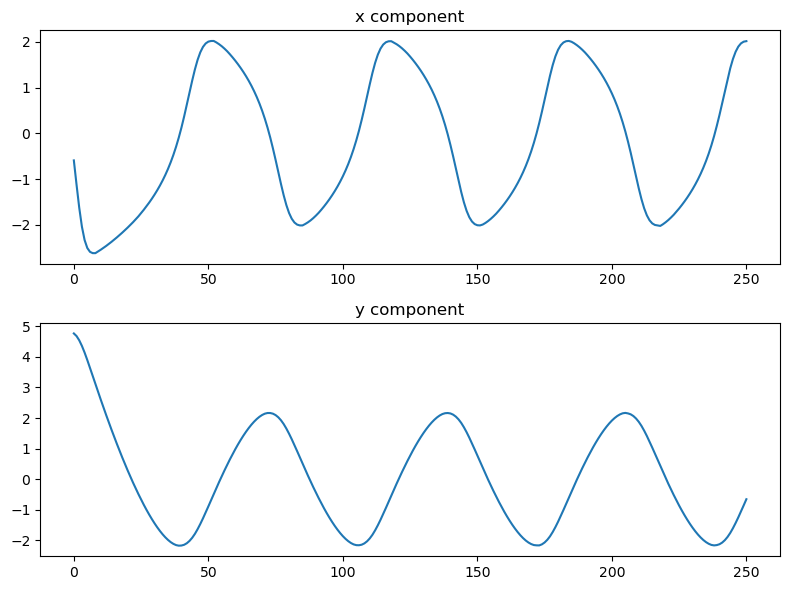

In [4]:
# Plot the dataset

file_path = os.path.join("../../dataset", dataset_name, f"{dataset_name}_0.npz")
X = np.load(file_path)["data"][0]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
ax1.plot(np.arange(0, np.shape(X)[0], 1), X[:, 0])
ax1.set_title("x component")

ax2.plot(np.arange(0, np.shape(X)[0], 1), X[:, 1])
ax2.set_title("y component")

plt.tight_layout()
plt.show()